In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import bokeh.plotting as bp
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
from bokeh.models import  WheelZoomTool, ResetTool, PanTool
%matplotlib inline 

## What is "learning from data"?

>In general **Learning from Data** is a scientific discipline that is concerned with the design and development of algorithms that allow computers to infer (from data) a  model that allows *compact representation* (unsupervised learning) and/or *good generalization* (supervised learning). 

This is an important technology because it enables computational systems to adaptively improve their performance with experience accumulated from the observed data. 

Most of these algorithms are based on the *iterative solution* of a mathematical problem that involves data and model. If there was an analytical solution to the problem, this should be the adopted one, but this is not the case for most of the cases.

So, the most common strategy for **learning from data** is based on solving a system of equations as a way to find a series of parameters of the model that minimizes a mathematical problem. This is called **optimization**.

The most important technique for solving optimization problems is **gradient descend**.

## Gradient descend (for *hackers*) for function minimization: 1-D

Let's suppose that we have a function $f: \Re \rightarrow \Re$. For example: 

$$f(x) = x^2$$

Our objective is to find the argument  $x$ that minimizes this function (for maximization, consider $-f(x)$). To this end, the critical concept is the **derivative**.

The derivative of $f$ of a variable $x$, $f'(x)$ or $\frac{\mathrm{d}f}{\mathrm{d}x}$,  is a measure of the rate at which the value of the function changes with respect to the change of the variable. It is defined as the following limit:


$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

The derivative specifies how to scale a small change in the input in order to obtain the corresponding change in the output: 

$$ f(x + h) \approx f(x) + h f'(x)$$

In [3]:
# numerical derivative at a point x

def f(x):
    return x**2

def fin_dif(x, f, h = 0.000001):
    return (f(x+h) - f(x))/h

x = 2.0
print(fin_dif(x,f))

4.0000010006480125


The limit as $h$ approaches zero, if it exists, should represent the **slope of the tangent line** to $(x, f(x))$. 

For values that are not zero it is only an approximation.

In [4]:
for h in np.linspace(0.0, 1.0 , 5):
    print("{:3.6f}".format(f(5+h)), "{:3.6f}".format(f(5)+h*fin_dif(5,f)))

25.000000 25.000000
27.562500 27.500000
30.250000 30.000001
33.062500 32.500001
36.000000 35.000001


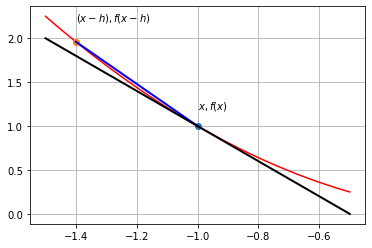

In [5]:
x = np.linspace(-1.5,-0.5, 100)
f = [i**2 for i in x]
plt.plot(x,f, 'r-')
plt.plot([-1],[1],'o')
plt.plot([-1.4],[1.96],'o') # h=0.4
plt.text(-1.0, 1.2,'$x,f(x)$')
plt.text(-1.4, 2.2,'$(x-h),f(x-h)$')
plt.plot([-1.4, -1.0], [1.96, 1.0], 'b-', lw=2) #the derivative with h=0.4
plt.plot([-1.5, -0.5], [2, 0.0], 'k-', lw=2) #tangent line (y=-2x-1)
plt.grid()
#plt.show

It can be shown that the “centered difference formula" is better when computing numerical derivatives:

$$ \lim_{h \rightarrow 0} \frac{f(x + h) - f(x - h)}{2h} $$

The error in the "finite difference" approximation can be derived from Taylor's theorem and, assuming that $f$ is differentiable, is $O(h)$. In the case of “centered difference" the error is $O(h^2)$.

The derivative tells us how steep the tangent line to the graph would be at a given point $(x, f(x))$. That steepness, or slope varies from point to point: some parts of the graph are flatter, and some parts slope up more steeply.
By examining the derivative at a given point $(x, f(x))$, we can know whether the function $f$ is increasing or decreasing at that point, and by how much.

<center><img src="files/graph2-derivative-increasing-decreasing.png" width="600" height="300">

We can follow these steps to **decrease** the value of the function:

+ Start from a random $x$ value.
+ Compute the derivative $f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x - h)}{2h}$.
+ Walk a small step in the **opposite** direction of the derivative, because we know that $f(x - h \mbox{ sign}(f'(x))$ < $f(x)$ for  small enough $h$. 

The search for the minima ends when the derivative is zero because we have no more information about which direction to move. $x$ is a critical o stationary point if $f'(x)=0$. 

 + A **minimum (maximum)** is a critical point where $f(x)$ is lower (higher) than at all neighboring points. 
 + There is a third class of critical points: **saddle points**.

If $f$ is a **convex function**, this should be the minimum (maximum) of our functions. In other cases it could be a local minimum (maximum) or a saddle point.

In [6]:
W = 400
H = 250
bp.output_notebook()

Loading BokehJS ...

In [7]:
x = np.linspace(-15,15,100)
y = x**2

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]

s1 = bp.figure(width=W, plot_height=H, 
               title='Local minimum of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

In [8]:
x = np.linspace(-15,15,100)
y = -x**2

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               title='Local maximum of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

In [9]:
x = np.linspace(-15,15,100)
y = x**3

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               title='Saddle point of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(0, 0, size =10, color="orange")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

There are two problems with numerical derivatives:
+ It is approximate.
+ It is very slow to evaluate (two function evaluations: $f(x + h) , f(x - h)$ ).

Our knowledge from Calculus could help!

We know that we can get an **analytical expression** of the derivative for **some** functions. 

For example, let's suppose we have a simple quadratic function, $f(x)=x^2−6x+5$, and we want to find the minimum of this function. 

#### First approach

We can solve this analytically using Calculus, by finding the derivate $f'(x)  =  2x-6$ and setting it to zero:

\begin{equation}
\begin{split}
2x-6  & = & 0 \\
2x  & = & 6 \\
x & = & 3 \\
\end{split}
\end{equation} 

In [10]:
x = np.linspace(-10,20,100)
y = x**2 - 6*x + 5
 
TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(3, 3**2 - 6*3 + 5, size =10, color="orange")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

#### Second approach

To find the local minimum using **gradient descend**: you start at a random point, and move into the direction of steepest **descent** relative to the derivative:

+ Start from a random $x$ value.
+ Compute the derivative $f'(x)$ analitically.
+ Walk a small step in the **opposite** direction of the derivative. 

In this example, let's suppose we start at $x=15$. The derivative at this point is $2*15−6=24$. 

Because we're using gradient descent, we need to subtract the gradient from our $x$-coordinate: $f(x - f'(x))$. However, notice that $15−24$ gives us $−9$, clearly overshooting over target of $3$. 

In [11]:
x = np.linspace(-10,20,100)
y = x**2 - 6*x + 5
start = 15

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


s1 = bp.figure(width=W, plot_height=H, 
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(start, start**2 - 6*start + 5, size =10, color="orange")

d = 2 * start - 6
end = start - d

s1.circle(end, end**2 - 6*end + 5, size =10, color="red")
s1.title.text_font_size = '12pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"

bp.show(s1)

To fix this, we multiply the gradient by a step size. This step size (often called **alpha** or **learning rate**) has to be chosen carefully, as a value too small will result in a long computation time, while a value too large will not give you the right result (by overshooting) or even fail to converge. 

In this example, we'll set the step size to 0.01, which means we'll subtract $24×0.01$ from $15$, which is $14.76$. 

This is now our new temporary local minimum: We continue this method until we either don't see a change after we subtracted the derivative step size, or until we've completed a pre-set number of iterations.

In [ ]:
old_min = 0
temp_min = 15 #initial random point
step_size = 0.01
precision = 0.0001
 
def f_derivative(x):
    return 2*x -6

mins = []
cost = []

while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    cost.append((3-temp_min)**2) #squared distance from temp_min to the true local minimum
    mins.append(temp_min)

# rounding the result to 2 digits because of the step size
print("Local minimum occurs at", round(temp_min,2))

An important feature of gradient descent is that **there should be a visible improvement over time**: In this example, we simply plotted the squared distance from the local minima calculated by gradient descent and the true local minimum,  ``cost``, against the iteration during which it was calculated. As we can see, the distance gets smaller over time, but barely changes in later iterations. 

In [ ]:
TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]

x = list(range(len(cost)))
y = cost
#x, y = (zip(*enumerate(cost)))
s1 = bp.figure(width=W, 
               height=H, 
               title='Squared distance to true local minimum',  
#                title_text_font_size='14pt', 
               tools=TOOLS,
               x_axis_label = 'Iteration',
               y_axis_label = 'Distance'
)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.title.text_font_size = '16pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"
bp.show(s1)

## From derivatives to gradient: $n$-dimensional function minimization.

Let's consider a $n$-dimensional function $f: \Re^n \rightarrow \Re$. For example: 

$$f(\mathbf{x}) = \sum_{n} x_n^2$$

Our objective is to find the argument  $\mathbf{x}$ that minimizes this function.

The **gradient** of $f$ is the vector whose components are the $n$ partial derivatives of $f$. It is thus a vector-valued function. 

The gradient points in the direction of the greatest rate of **increase** of the function.

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

In [ ]:
def f(x):
    return sum(x_i**2 for x_i in x)

def fin_dif_partial_centered(x, f, i, h=1e-6):
    w1 = [x_j + (h if j==i else 0) for j, x_j in enumerate(x)]
    w2 = [x_j - (h if j==i else 0) for j, x_j in enumerate(x)]
    return (f(w1) - f(w2))/(2*h)

def gradient_centered(x, f, h=1e-6):
    return[round(fin_dif_partial_centered(x,f,i,h), 10) for i,_ in enumerate(x)]

x = [1.0,1.0,1.0]

print(f(x), gradient_centered(x,f))

The function we have evaluated, $f({\mathbf x}) = x_1^2+x_2^2+x_3^2$, is $3$ at $(1,1,1)$ and the gradient vector at this point is $(2,2,2)$. 

Then, we can follow this steps to maximize (or minimize) the function:

+ Start from a random $\mathbf{x}$ vector.
+ Compute the gradient vector.
+ Walk a small step in the opposite direction of the gradient vector.

> It is important to be aware that this gradient computation is very expensive: if $\mathbf{x}$ has dimension $n$, we have to evaluate $f$ at $2*n$ points.

### How to use the gradient.

$f(x) = \sum_i x_i^2$, takes its mimimum value when all $x$ are 0. 

Let's check it for $n=3$: 

Let's start by choosing a random vector and then walking a step in the opposite direction of the gradient vector. We will stop when the difference between the new solution and the old solution is less than a tolerance value.

In [ ]:
# choosing a random vector

import random
import numpy as np

x = [random.randint(-10,10) for i in range(3)]
x

In [ ]:
def step(x,grad,alpha):
    return [x_i - alpha * grad_i for x_i, grad_i in zip(x,grad)]

def euc_dist(v1,v2):
    import numpy as np
    import math
    v = np.array(v1)-np.array(v2)
    return math.sqrt(sum(v_i ** 2 for v_i in v))

tol = 1e-15
alpha = 0.01
while True:
    grad = gradient_centered(x,f)
    next_x = step(x,grad,alpha)
    if euc_dist(next_x,x) < tol: #calculate Euclidean distance in n dimensions
        break
    x = next_x
print([round(i,10) for i in x])

### Alpha

The step size, **alpha**, is a slippy concept: if it is too small we will slowly converge to the solution, if it is too large we can diverge from the solution. 

There are several policies to follow when selecting the step size:

+ Constant size steps. In this case, the size step determines the precision of the solution.
+ Decreasing step sizes with iterations.
+ At each iteration, select the optimal step.

The last policy is good, but too expensive. In this case we will consider a fixed set of values (at each iteration):

In [ ]:
step_size = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

## Learning from data

In general, we have:

+ A dataset $(\mathbf{x},y)$. 
+ A target function $f_\mathbf{w}$, that we want to minimize, representing the discrepancy between our data and the model we want to fit. The model is represented by a set of parameters $\mathbf{w}$. 
+ The gradient of the target function, $g_f$. 


In the most common case $f_\mathbf{w}$ represents the errors from a data representation model $M$. To fit the model is to find the optimal parameters $\mathbf{w}$ that minimize the following expression:

$$ f_\mathbf{w} = \sum_{i} (y_i - M(\mathbf{x}_i,\mathbf{w}))^2 $$

For example, $(\mathbf{x},y)$ can represent:

+ $\mathbf{x}$: the behavior of a "Candy Crush" player; $y$: monthly payments. 
+ $\mathbf{x}$: sensor data about your car engine; $y$: probability of engine error.
+ $\mathbf{x}$: finantial data of a bank customer; $y$: customer rating.

> If $y$ is a real value, it is called a *regression* problem.

> If $y$ is binary/categorical, it is called a *classification* problem. 

Let's suppose that $M(x_i,\mathbf{w}) = w * x_i$. 

### Batch gradient descent

We can implement **gradient descent** in the following way (*batch gradient descent*):

In [ ]:
#random.seed(10)

# find the value of w that minimizes the target (objective) function f_w: Sum((y-wx)**2)

x = range(10)
y = [2*i for i in x] # y = 2x

# f_target = Sum ((y - wx)**2)
def target_f(x,y,w):
    import numpy as np
    return np.sum((np.array(y) - np.array(x) * w)**2.0)

# gradient_f_target = Sum(2wx**2 - 2xy)
def gradient_f(x,y,w):
    import numpy as np
    return np.sum(2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y))

def step(w,grad,alpha):
    return w - alpha * grad

def min_batch(target_f, gradient_f, x, y, toler = 1e-6):
    import random
    alphas = [100, 10, 1, 0.1, 0.001, 0.00001]
    w = random.random()
    val = target_f(x,y,w)
    print("First w:", w, "First Val:", val, "\n")
    i = 0
    while True:
        i += 1
        gradient = gradient_f(x,y,w)
        next_ws = [step(w, gradient, alpha) for alpha in alphas] #calculate the step for the different alphas
        next_vals = [target_f(x,y,w) for w in next_ws] #obtain next values per step
        min_val = min(next_vals) # select the minimum value
        next_w = next_ws[next_vals.index(min_val)] #save the step corresponding to the minimum value 
        next_val = next_vals[next_vals.index(min_val)] #save the minimum function value
        alpha_val = alphas[next_vals.index(min_val)]   #save the alpha leading to minimum function value
        print(i, "w: {:4.4f}".format(w), "Val:{:4.4f}".format(val), "Gradient:{:4.4f}".format(gradient), "Alpha:",alpha_val)        
        if (abs(val - next_val) < toler) or (i>200):
            return w
        else:
            w, val = next_w, next_val
            
min_batch(target_f, gradient_f, x, y)

### Exercise: 
+ 1. Consider a set of 100 data points and explain the behavior of the algorithm. 
+ 2. How could we fix this behavior?


In [ ]:
#Your solution here

### Stochastic Gradient Descent

The last function evals the objective function $f_\mathbf{w}$ with respect to each parameter/feature at every step.

If the dataset is large, this strategy is too costly. In this case we will use a strategy called **SGD** (*Stochastic Gradient Descent*). It consists on replacing the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). 

Then, we compute the estimate of the gradient (and move towards the minimum) by using only **one data sample** (or a small data sample). We find the minimum by iterating this gradient estimation over the dataset.

A full iteration over the dataset is called **epoch**. During an epoch, data must be used in a random order.

If we apply this method we have some guarantees to find the minimum. 

In [ ]:
import numpy as np
x = range(10)
y = [2*i for i in x]
data = list(zip(x,y))

def in_random_order(data):
    import random
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
        
for (x_i,y_i) in in_random_order(data):
    print(x_i,y_i) 

In [ ]:
def gradient_f_SGD(x,y,w):
    import numpy as np
    return 2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y) #Note there is no sum of elements

def SGD(target_f, gradient_f, x, y, alpha_0=0.001):
    import numpy as np
    import random
    data = list(zip(x,y))
    w = random.random()
    alpha = alpha_0
    min_w, min_val = float('inf'), float('inf')
    iteration_no_increase = 0
    alpha_vect = []
    min_w_vect = []
    while iteration_no_increase < 100: 
        val = sum(target_f(x_i, y_i, w) for x_i,y_i in data) # full iteration of the global error with updated w
        if val < min_val: 
            # the global error gets lower with updated w
            min_w, min_val = w, val
            iteration_no_increase = 0
            alpha = alpha_0
        else:
            # the global error is not improving -> decrease alpha temporarily (until out of possible local minima)
            iteration_no_increase += 1
            alpha *= 0.9 #decrease alpha
        for x_i, y_i in in_random_order(data): 
            gradient_i = gradient_f(x_i, y_i, w)  #gradient evaluation at each point
            w = np.array(w) - (alpha *  np.array(gradient_i)) # update w
        min_w_vect.append(w)
        alpha_vect.append(alpha)
    return min_w_vect, alpha_vect

In [ ]:
min_w_vect, alpha_vect = SGD(target_f, gradient_f_SGD, x, y, 0.001)
print("w= ",min_w_vect[-5:])
plt.plot(min_w_vect)
plt.show()

In [ ]:
plt.plot(alpha_vect)
plt.show()

### Exercise: 
 Run SDG considering a set of 100 data points and explain the behavior of the algorithm. 


In [ ]:
#your solution here

## Gradient Descent and Linear Regression

The linear regression model assumes a linear relationship between data:

$$ y_i = w_1 x_i + w_0 $$

Let's generate a more realistic dataset (with noise), where $w_1 = 2$ and $w_0 = 0$:

In [ ]:
import numpy as np
x = np.random.uniform(0,1,20)

def f(x): return x*2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()

In [ ]:
# Our cost function
def cost(y, t): return ((t - y)**2).sum()

ws = np.linspace(0, 4, num=100)  
cost_ws = np.zeros(ws.shape)
for ind,w in enumerate(ws):
    cost_ws[ind]=cost(x*w, y) 
    
# Ploting the cost function for different values of w
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.title('Cost vs. $w$')
plt.grid()
plt.gcf().set_size_inches((10,6))
plt.show()

### Exercise

Complete the following code and look at the plot of the first gradient descent updates. Explore the behavior of the proposed alpha or learning rate.

In [ ]:
#your solution here

# gradient_f_target = Sum 2wx**2 - 2xy
def gradient_f(x,y,w):
    import numpy as np
    return np.sum(2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y))

# initial value for w
w = 0.1

# define a learning_rate (alpha) 
learning_rate = .1

nb_of_iterations = 20  
w_cost = [(w, cost(x*w, y))] 
for i in range(nb_of_iterations):
    # Here your code in 3 lines: 
    #1) compute the gradient   
    
    #2) Walk a small step in the opposite direction of the derivative
    
    #3) save w and global error in w_cost
    
    
for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

In [ ]:
Plot the gradient descent updates on the cost function

In [ ]:
# your solution here

Plot the input data and linear regression results with the obtained w

In [ ]:
# your solution here

## Mini-batch Gradient Descent

In code, general batch gradient descent looks something like this:

```python
nb_epochs = 100
for i in range(nb_epochs):
    grad = evaluate_gradient(target_f, data, w)
    w = w - learning_rate * grad
```

For a pre-defined number of epochs, we first compute the gradient vector of the target function for the whole dataset w.r.t. our parameter vector. 

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example and label:

```python
nb_epochs = 100
for i in range(nb_epochs):
    np.random.shuffle(data)
    for example in data:
        grad = evaluate_gradient(target_f, example, w)
        w = w - learning_rate * grad
```

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of $n$ training examples:

```python
nb_epochs = 100
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    grad = evaluate_gradient(target_f, batch, w)
    w = w - learning_rate * grad
```

Minibatch SGD has the advantage that it works with a slightly less noisy estimate of the gradient. However, as the minibatch size increases, the number of updates done per computation done decreases (eventually it becomes very inefficient, like batch gradient descent). 

There is an optimal trade-off (in terms of computational efficiency) that may vary depending on the data distribution and the particulars of the class of function considered, as well as how computations are implemented.